In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
df = pd.read_excel('drive/MyDrive/dano_data.xlsx').drop(columns = ['Unnamed: 0'])
df_source = df.copy()
df.head(10)

,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
0,3379c95477164e679ef80291a36a50ec,2023-03-05,772887927.0,DCV,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2e23732fef4749e1ae7a89ec978b7bf7,2023-03-05,858351423.0,DCV,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,df795c04bd834c0d8a2960d3b0593938,2023-03-09,864683115.0,DCV,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,7c2512d6bf2d47fe91eefc75f8062698,2023-03-13,294312227.0,DCV,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,ca547a88dd0c42f2a50657af01b87317,2023-03-03,815163498.0,DCV,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,1d434d73d46e4251867a200050059b71,2023-03-17,993235594.0,DCV,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,a1ed0e65df5242fcaf08713a4e90948e,2023-03-29,753966360.0,DCV,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,b00d73ed8f54404f93c8073ddb02a460,2023-03-10,790509663.0,DCV,1,1,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
8,c72c66234bde4c5ca451dea5d623198c,2023-03-13,956250503.0,DCV,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9,cdbcc8fbe6944dd19fcfcdadd9d51bef,2023-03-12,966498219.0,DCV,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df = df_source.copy()

In [21]:
print(df['res_segment'].value_counts())

РФ            50118
Пусто         17115
Восток СНГ     4555
Запад СНГ       938
Остальное       919
Name: res_segment, dtype: int64


count    41818.000000
mean        52.128391
std         31.988024
min          0.001692
25%         30.999980
50%         44.455673
75%         61.121023
max        275.000150
Name: subscription_time, dtype: float64


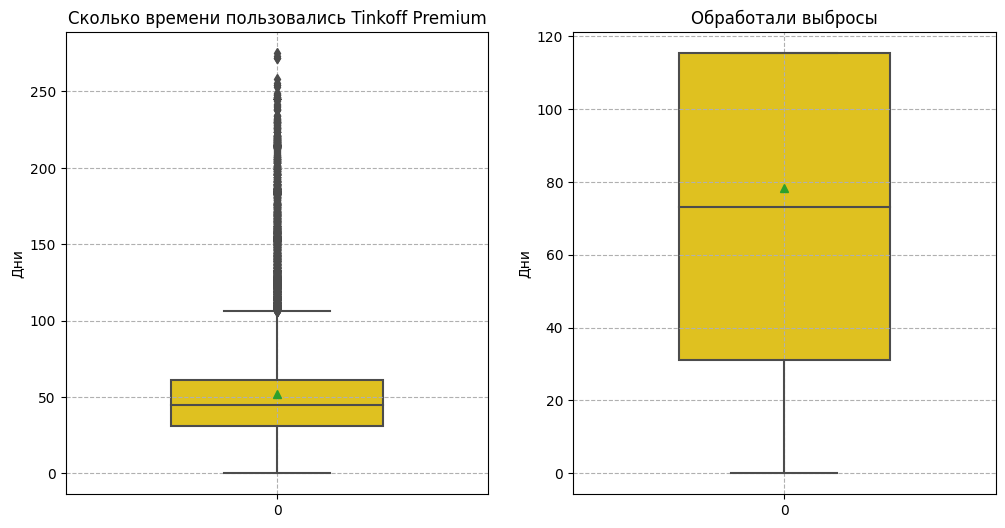

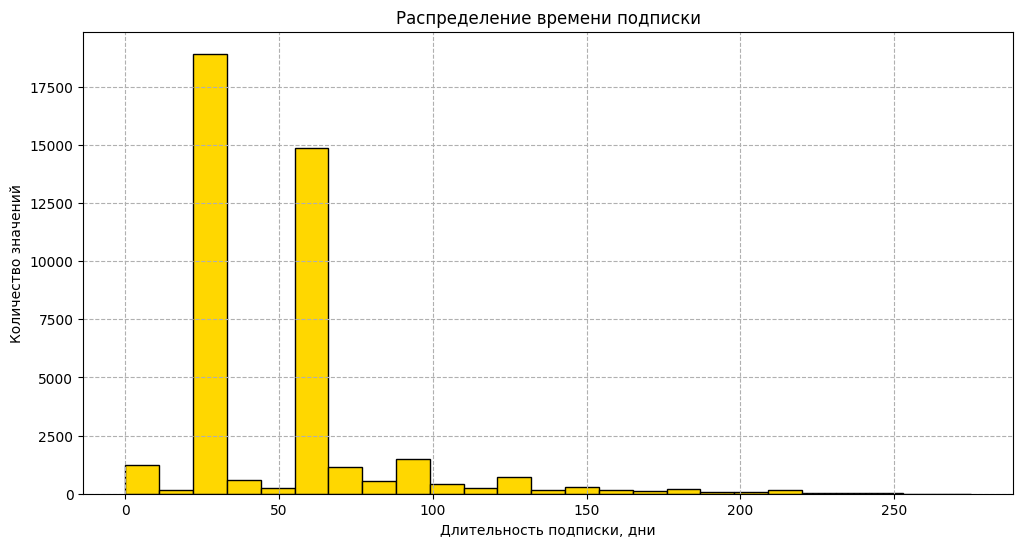

In [25]:
plt.rcParams['figure.figsize'] = [12,6]
data = df['subscription_time'] / (3600 * 24)
print(data.describe())
plt.tight_layout(h_pad = 3)
plt.subplot(1, 2, 1)
sns.boxplot(
    data=data,
    showmeans=True,
    color = 'gold',
    width = 0.5
)
plt.ylabel('Дни')
plt.title('Сколько времени пользовались Tinkoff Premium')
plt.grid(linestyle = '--')

plt.subplot(1, 2, 2)
edge = df['subscription_time'].quantile(0.95)
df['subscription_time'] = df['subscription_time'].transform(lambda x: x if x <= edge else edge).reset_index().drop(columns=['index'])
sns.boxplot(
    data=df['subscription_time'] / (3600 * 24),
    showmeans=True,
    color = 'gold',
    width = 0.5
)
plt.ylabel('Дни')
plt.title('Обработали выбросы')
plt.grid(linestyle = '--')
plt.show()
plt.title('Распределение времени подписки')
plt.ylabel('Количество значений')
plt.xlabel('Длительность подписки, дни')
plt.grid(linestyle = '--')
plt.rcParams['figure.figsize'] = [16,4]
plt.hist(df_source['subscription_time'] / (3600*24), color = 'gold', edgecolor = 'black', bins = 25)
plt.show()
plt.rcParams['figure.figsize'] = [12,6]

count      0.073712
mean       0.559313
std        1.898716
min        0.000000
25%        0.006366
50%        0.108543
75%        0.478945
max      125.843072
Name: out_total_5ms_amt, dtype: float64
0.6343387420000001


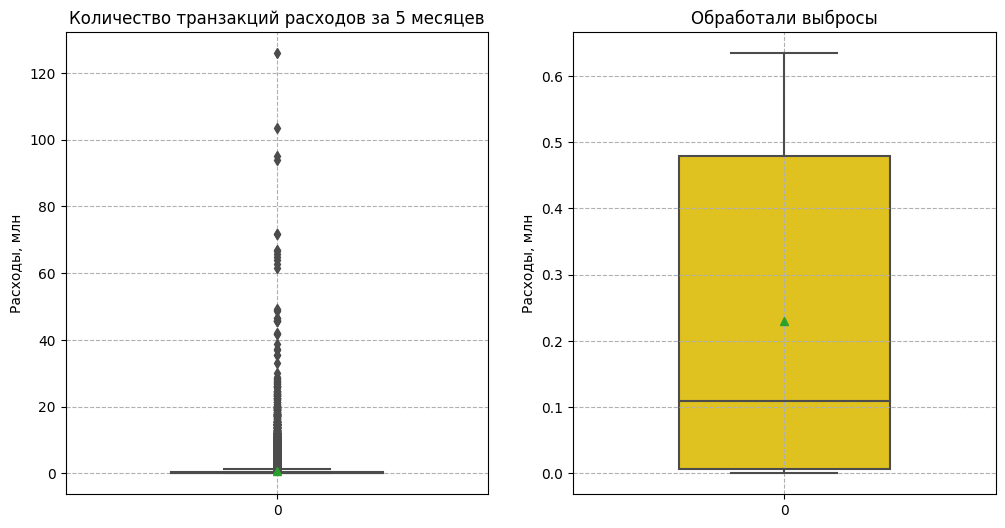

In [26]:
print(df_source['out_total_5ms_amt'].describe() / 10**6)
plt.tight_layout(h_pad = 3)
plt.subplot(1, 2, 1)
data = df_source['out_total_5ms_amt']
sns.boxplot(
    data=data / 10**6,
    showmeans=True,
    color = 'gold',
    width = 0.5
)
plt.ylabel('Расходы, млн')
plt.title('Количество транзакций расходов за 5 месяцев')
plt.grid(linestyle = '--')

plt.subplot(1, 2, 2)
edge = df_source['out_total_5ms_amt'].quantile(0.8)
print(edge / 10**6)
df['out_total_5ms_amt'] = df['out_total_5ms_amt'].transform(lambda x: edge if x > edge else x).reset_index().drop(columns = 'index')
sns.boxplot(
    data=df['out_total_5ms_amt'] / 10**6,
    showmeans=True,
    color = 'gold',
    width = 0.5
)
plt.ylabel('Расходы, млн')
plt.title('Обработали выбросы')
plt.grid(linestyle = '--')
plt.show()

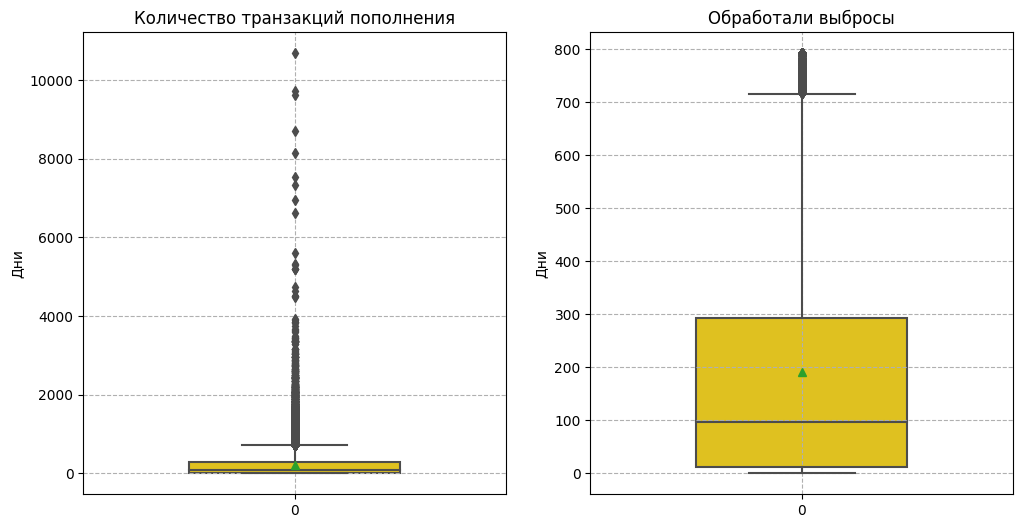

In [27]:
plt.tight_layout(h_pad = 3)
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df_source['in_5ms_cnt'],
    showmeans=True,
    color = 'gold',
    width = 0.5
)
plt.ylabel('Дни')
plt.title('Количество транзакций пополнения')
plt.grid(linestyle = '--')

plt.subplot(1, 2, 2)
edge = df_source['in_5ms_cnt'].quantile(0.95)
df['in_5ms_cnt'] = df['in_5ms_cnt'].transform(lambda x: x if x <= edge else edge).reset_index().drop(columns = 'index')
sns.boxplot(
    data=df['in_5ms_cnt'],
    showmeans=True,
    color = 'gold',
    width = 0.5
)
plt.ylabel('Дни')
plt.title('Обработали выбросы')
plt.grid(linestyle = '--')
plt.show()

In [28]:
print(df['trial_type'].unique())
trial = {i: int(i[0]) for i in df['trial_type'].unique()[1:]}
trial[np.nan] = 0
df['trial_type'] = df['trial_type'].transform(lambda x: trial[x])

[nan '1 mon' '3 mons' '2 mons' '5 mons' '4 mons' '6 mons']


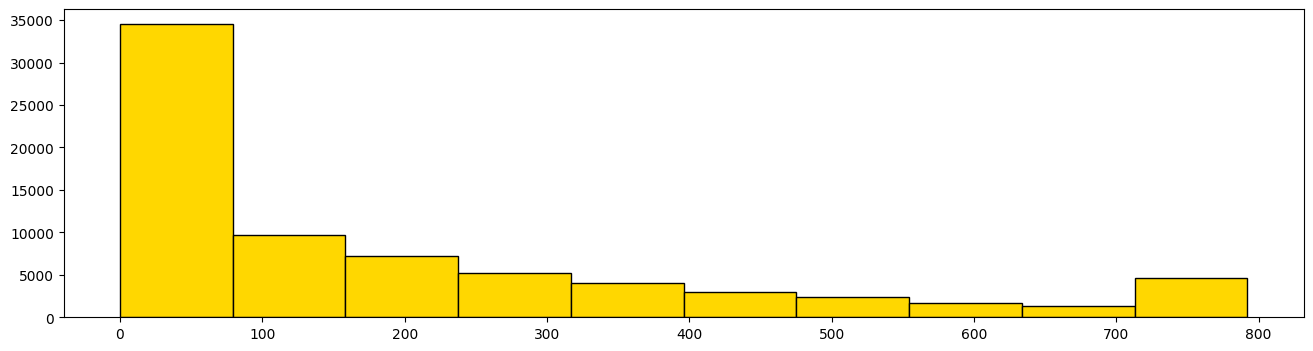

In [29]:
plt.rcParams['figure.figsize'] = [16,4]
plt.hist(df['in_5ms_cnt'], color = 'gold', edgecolor = 'black')
plt.show()
plt.rcParams['figure.figsize'] = [12,6]

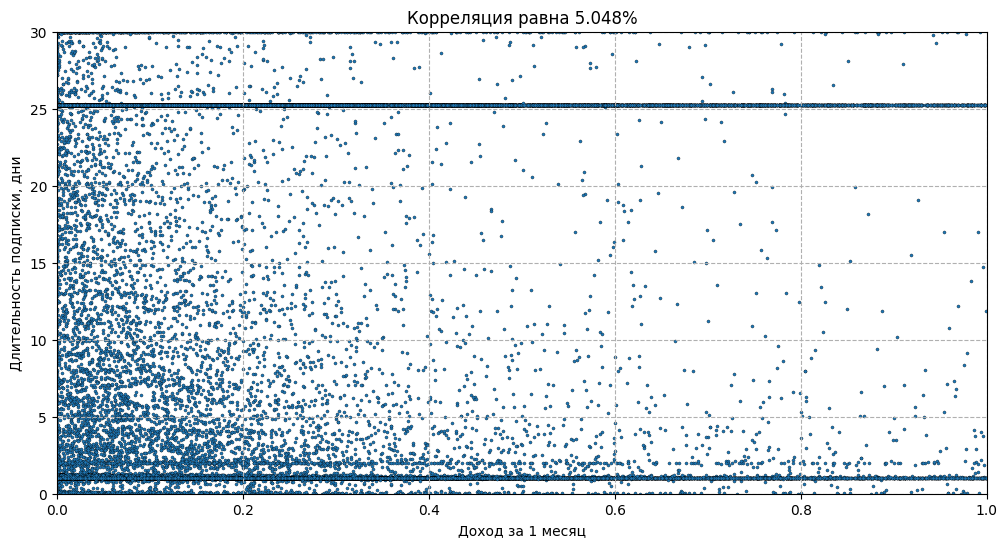

In [88]:
plt.scatter(df['in_total_1ms_amt'] / 10**6, df['subscription_time'] / (3600 * 24) % 30, edgecolors = 'black', s = 5, linewidth = 0.2)
plt.axis([0, 1, 0, 30])
plt.xlabel('Доход за 1 месяц')
plt.ylabel('Длительность подписки, дни')
plt.title('Корреляция равна '+str((df['in_total_1ms_amt'].corr(df['subscription_time'] / (3600*24) % 30) * 100).round(3))+'%')
plt.grid(linestyle = '--')
plt.show()

In [89]:
groups = [
    df['subscription_time'][(df['in_total_1ms_amt'] >= 100000*i) & (df['in_total_1ms_amt'] < 100000*(i+1))] / (3600*24) % 30 for i in range(10)
]

for i in groups:
    print(i.mean())

scipy.stats.f_oneway(groups[1], groups[2], groups[3], groups[4], groups[5], groups[6], groups[7], groups[8], groups[9])

13.663160778512758
11.342858023167423
11.56111164820629
11.605785273044678
11.989252943874378
12.608848328381045
12.600820987406712
13.023732526343402
13.827467009242751
13.417431302271691


F_onewayResult(statistic=9.580502990726933, pvalue=2.4219098374587786e-13)

sch_flg -12.578 / 13.786
success_flg -15.093 / 16.601
lk_flg 0.898 / 7.955
car_ins_flg -0.207 / 3.359
percent_flg 2.213 / 4.797
vzr_flg -0.037 / 5.199
concierge_flg -0.699 / 2.576
cash_out_flg 2.407 / 8.495
cb_flg 3.53 / 7.717
invest_flg -15.05 / 3.701
out_c2c_flg -2.967 / 8.712
inkas_flg 0.631 / 1.577
idx_active_usage -8.048 / 13.191
idx_successful_request -14.893 / 16.249
idx_total_interest -15.771 / 13.191


<Axes: >

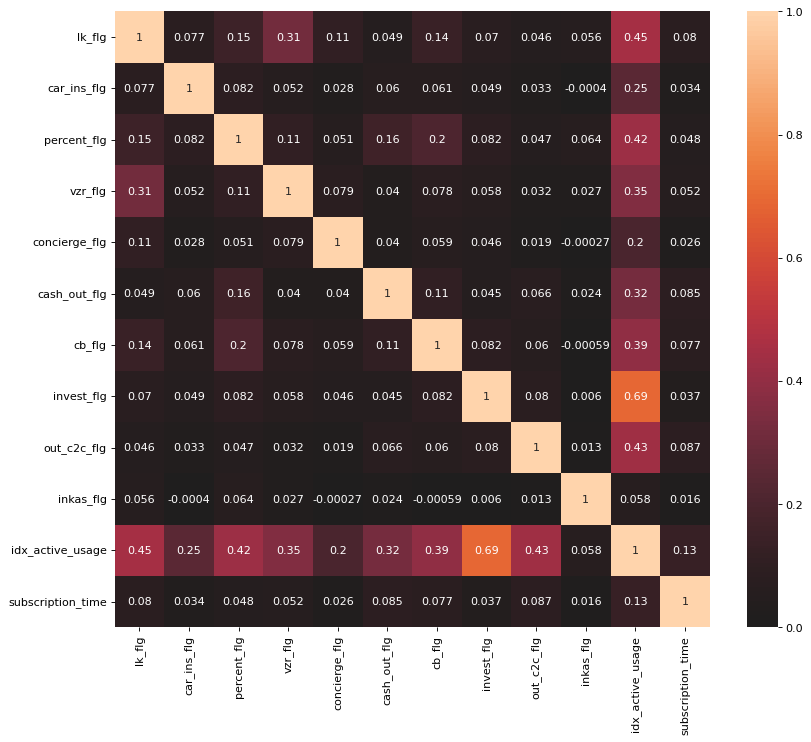

In [14]:
columns1 = ['sch_flg', 'success_flg']
columns2 = ['lk_flg','car_ins_flg','percent_flg','vzr_flg','concierge_flg','cash_out_flg','cb_flg','invest_flg','out_c2c_flg','inkas_flg']
data = df[columns1+columns2].copy()
data['idx_active_usage'] = 0
data['idx_successful_request'] = 0
df_source['idx_active_usage'] = 0

for i in columns1:
    data['idx_successful_request'] = data['idx_successful_request'] + data[i]
for i in columns2:
    data['idx_active_usage'] = data['idx_active_usage'] + data[i]

data['idx_total_interest'] = data['idx_active_usage']+data['idx_successful_request']

df['idx_successful_request'] = data['idx_successful_request']
df['idx_active_usage'] = data['idx_active_usage']
df['idx_total_interest'] = data['idx_active_usage']
df_source['idx_successful_request'] = data['idx_successful_request']
df_source['idx_active_usage'] = data['idx_active_usage']
df_source['idx_total_interest'] = data['idx_active_usage']+data['idx_successful_request']

for i in data.columns:
    print(i, round(df['subscription_time'].corr(data[i])*100, 3), '/', round(df_source['subscription_time'].corr(df[i])*100, 3))
correl = df_source[columns2+['idx_active_usage', 'subscription_time']].corr()
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(correl, xticklabels=correl.columns, yticklabels=correl.columns, center=0, annot=True)

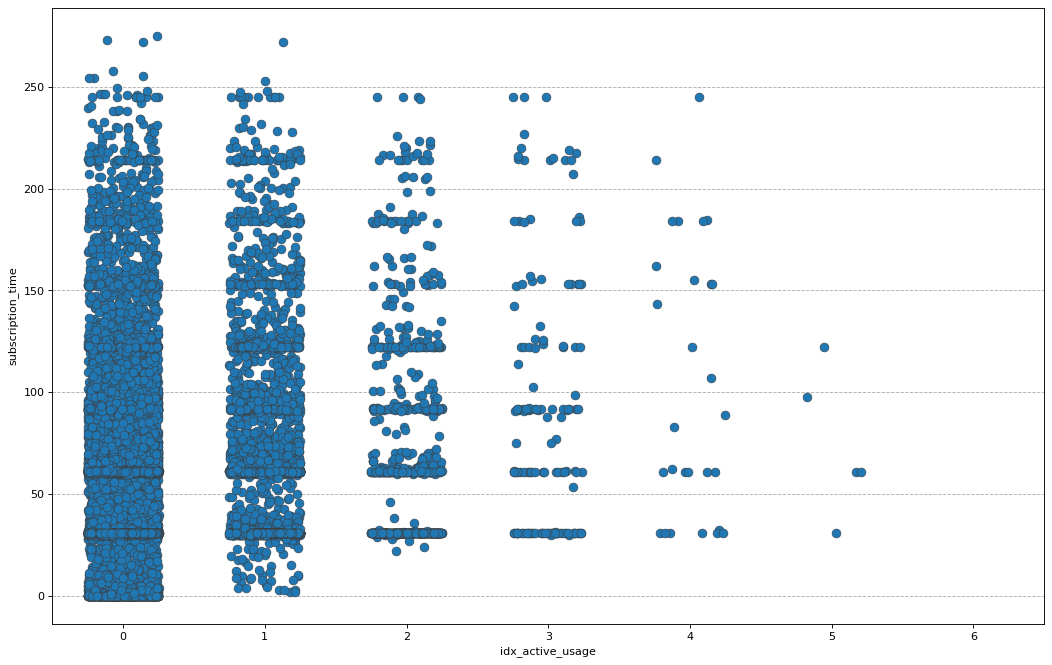

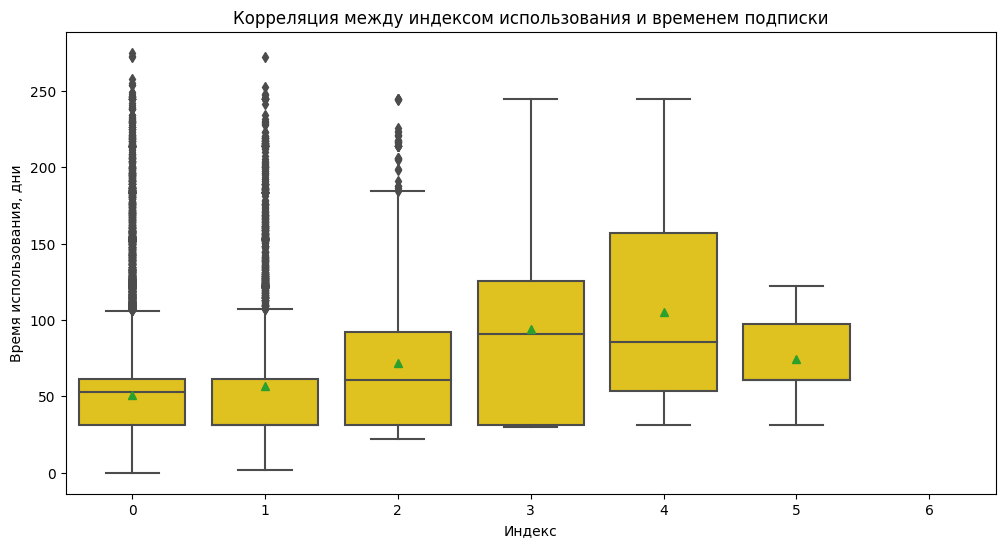

In [92]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
plt.grid(linestyle = '--')
sns.stripplot(x = df_source.idx_active_usage, y = df_source.subscription_time / (3600*24), jitter=0.25, size=8, ax=ax, linewidth=.5)
plt.show()
sns.boxplot(data = [df_source['subscription_time'][df_source['idx_active_usage'] == i] / (3600*24) for i in sorted(df['idx_active_usage'].unique())], showmeans = True, color = 'gold')
plt.title('Корреляция между индексом использования и временем подписки')
plt.xlabel('Индекс')
plt.ylabel('Время использования, дни')
plt.show()

In [96]:
print(df_source['subscription_time'][df_source['idx_active_usage'] == 0].mean(), df_source['subscription_time'][df_source['idx_active_usage'] == 1].mean())
scipy.stats.ttest_ind(df_source['subscription_time'][df_source['idx_active_usage'] == 0],
                     df_source['subscription_time'][df_source['idx_active_usage'] == 1])

4371770.917206387 4882505.356067464


TtestResult(statistic=nan, pvalue=nan, df=nan)

<ipython-input-16-efd6bae09239>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = data.corr()


<Axes: >

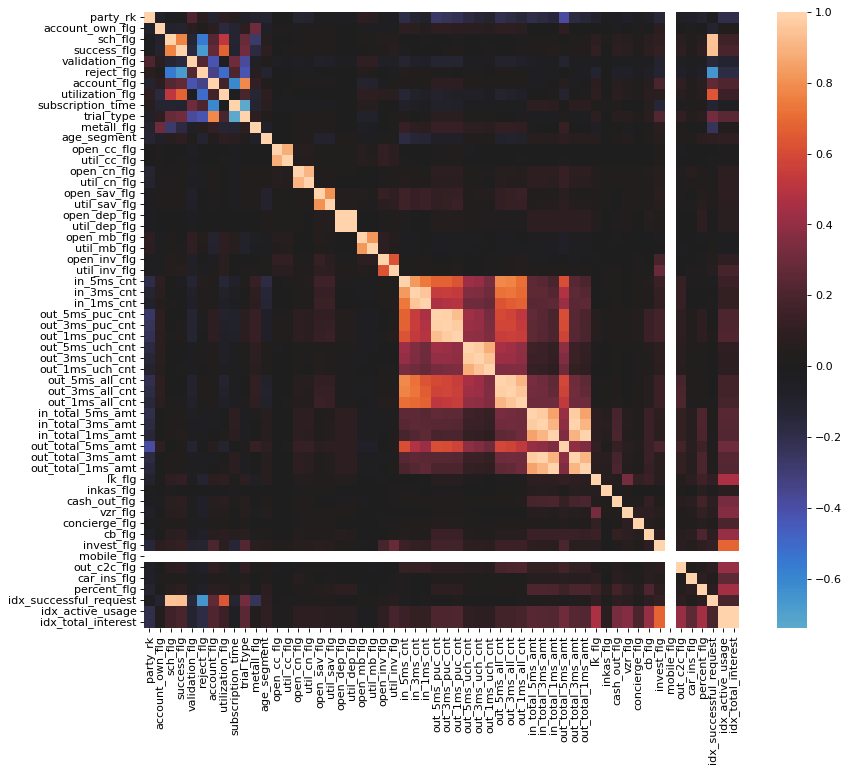

In [16]:
age = {
    '0-13': 13/2,
    '14-17': (14+17)/2, '18-22': (18+22)/2,
    '23-25': (23+25)/2, '26-30': (26+30)/2,
    '31-35': (31+35)/2, '36-40': (36+40)/2,
    '41-45': (41+45)/2, '46-50': (46+50)/2,
    '51-55': (51+55)/2, '56-60': (56+60)/2,
    '61-65': (61+65)/2, '65+':   (65+100)/2,
}

data = df[
    (~df['age_segment'].isin(['Пусто', np.nan])) &
     (df['subscription_time'] != np.nan) &
      (df['out_total_5ms_amt'] != 0)].copy()
data['age_segment'] = data['age_segment'].transform(lambda x: age[x])

correl = data.corr()
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(correl, xticklabels=correl.columns, yticklabels=correl.columns, center=0, annot=False)

                   out_total_5ms_amt  subscription_time
out_total_5ms_amt           1.000000          -0.157589
subscription_time          -0.157589           1.000000


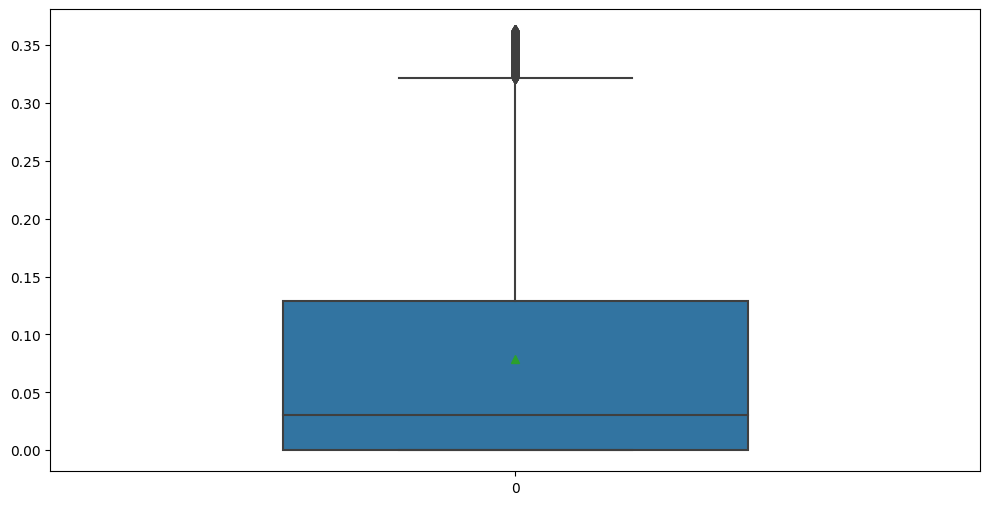

In [17]:
edge = df['out_total_5ms_amt'].quantile(0.7)
data = df[['out_total_5ms_amt', 'subscription_time']][df['out_total_5ms_amt'] <= edge]
sns.boxplot(
    data=data['out_total_5ms_amt'] / 10**6,
    showmeans=True,
    width = 0.5
)
print(data.corr())
plt.show()

['18-22' '14-17' '36-40' 'Пусто' '56-60' '51-55' '41-45' '26-30' '31-35'
 '65+' nan '23-25' '61-65' '46-50' '0-13']


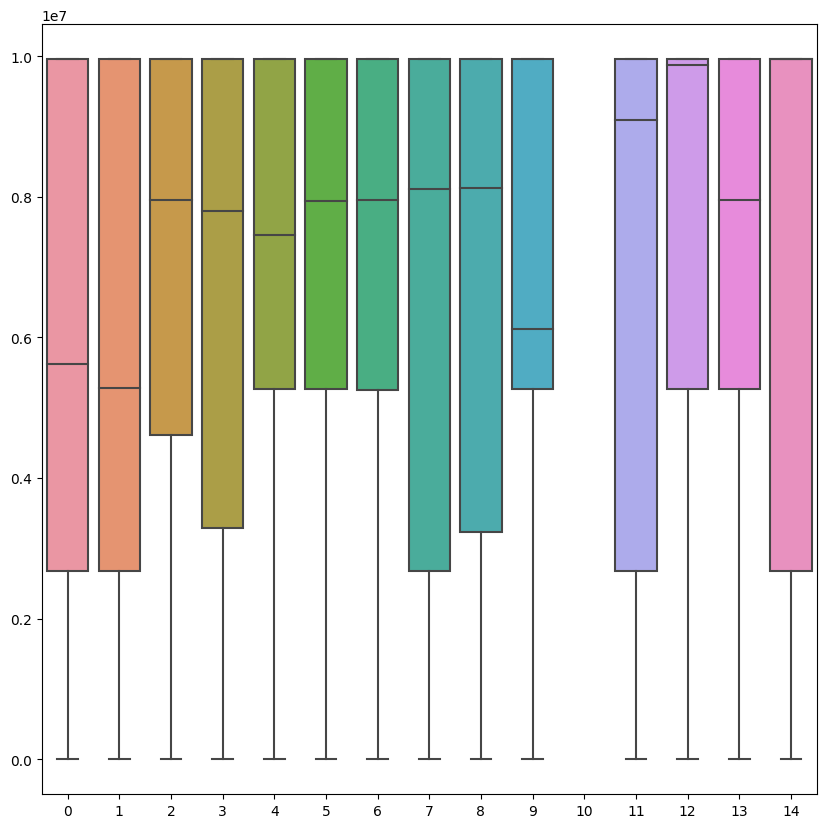

In [18]:
age = df['age_segment'].unique()
plt.rcParams['figure.figsize'] = [10,10]
print(age)
val = [list(df['subscription_time'][df['age_segment'] == age[i]]) for i in range(len(age))]
sns.boxplot(val)
plt.show()